# Entrenamiento del modelo utilizando 2 features

#### Preparación de datos

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score

In [2]:
data = pd.read_csv('data/data.csv')
data = data.drop(['id'], axis=1)
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})
x = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']

In [3]:
x = StandardScaler().fit_transform(x)

#Selección de componentes principales
x_transformed = PCA(n_components=2, random_state=40).fit_transform(x)

#Dividir el conjunto de datos
x_train, x_valid, y_train, y_valid = train_test_split(x_transformed,y,test_size = 0.2 ,stratify=y, random_state= 1 )

## Random Forest Classifier

In [4]:
classifier = RandomForestClassifier()
scores = cross_validate(classifier, x, y, cv =6, scoring=['f1', 'accuracy', 'recall'])

In [5]:
f1= scores['test_f1'].mean()
accuracy = scores['test_accuracy'].mean()
recall = scores['test_recall'].mean()

Accuracy Score: 96.31
Recall Score: 93.41
F1 Score: 94.96


<Axes: >

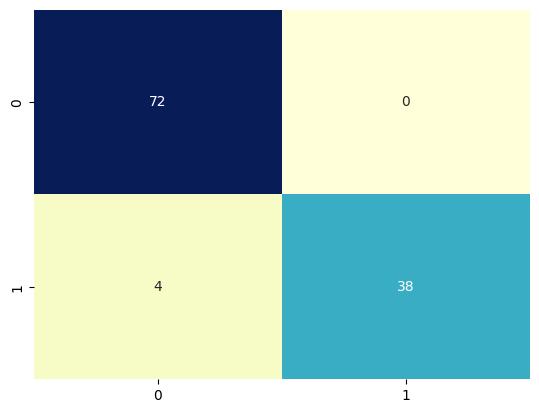

In [6]:
print(f'Accuracy Score: {accuracy*100:.2f}')
print(f'Recall Score: {recall*100:.2f}')
print(f'F1 Score: {f1*100:.2f}')

predictions = classifier.fit(x_train, y_train).predict(x_valid)

cm_pca_2 = confusion_matrix(y_valid, predictions)
sns.heatmap(cm_pca_2,annot=True, fmt='d', cmap='YlGnBu', cbar=False,)

## Red Neuronal con Keras

In [7]:
import tensorflow as tf

mlp_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
mlp_model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.002),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
mlp_model.fit(x_train,y_train, epochs=100)

2024-01-29 20:11:12.108371: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6272 - accuracy: 0.8264
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6250 - accuracy: 0.8264
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6229 - accuracy: 0.8264
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6208 - accuracy: 0.8264
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6187 - accuracy: 0.8264
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6166 - accuracy: 0.8242
Epoch 7/100
15/15 [==============================] - 0s 918us/step - loss: 0.6145 - accuracy: 0.8242
Epoch 8/100
15/15 [==============================] - 0s 868us/step - loss: 0.6126 - accuracy: 0.8264
Epoch 9/100
15/15 [==============================] - 0s 861us/step - loss: 0.6105 - accuracy: 0.8264
Epoch 10/100
15/15 [==============================] - 0s 879us/step - loss: 0.6085 - accuracy: 0.8264
E

4/4 [==============================] - 0s 1ms/step
Accuracy Score with PCA: 84.21
Recall score: 73.81
F1 score: 77.50


<Axes: >

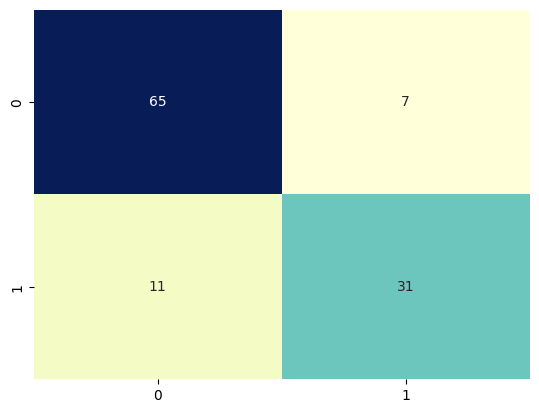

In [8]:
predictions = mlp_model.predict(x_valid).round()

print(f'Accuracy Score with PCA: {accuracy_score(y_valid, predictions)*100:.2f}')
print(f'Recall score: {recall_score(y_valid, predictions)*100:.2f}')
print(f'F1 score: {f1_score(y_valid, predictions)*100:.2f}')

cm_pca = confusion_matrix(y_valid, predictions)
sns.heatmap(cm_pca,annot=True, fmt='d', cmap='YlGnBu', cbar=False,)

In [9]:
mlp_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
mlp_model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.0036),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
mlp_model.fit(x_train,y_train, epochs=100)

Epoch 1/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4105 - accuracy: 0.8747
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.9209
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3989 - accuracy: 0.9209
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3943 - accuracy: 0.9209
Epoch 5/100
15/15 [==============================] - 0s 981us/step - loss: 0.3905 - accuracy: 0.9209
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3871 - accuracy: 0.9209
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3841 - accuracy: 0.9209
Epoch 8/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3817 - accuracy: 0.9209
Epoch 9/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3791 - accuracy: 0.9209
Epoch 10/100
15/15 [==============================] - 0s 931us/step - loss: 0.3766 - accuracy: 0.9209
Epoch

4/4 [==============================] - 0s 1ms/step
Accuracy Score with PCA: 95.61
Recall score: 95.24
F1 score: 94.12


<Axes: >

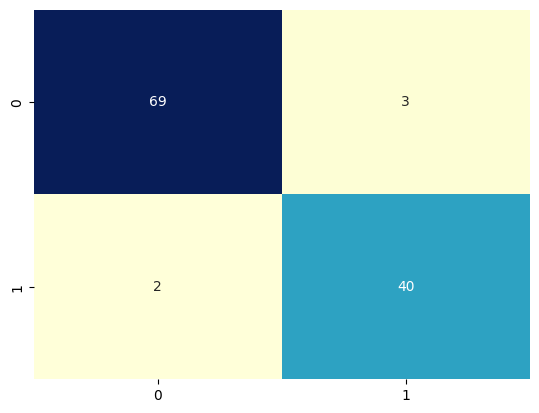

In [10]:

predictions = mlp_model.predict(x_valid).round()

print(f'Accuracy Score with PCA: {accuracy_score(y_valid, predictions)*100:.2f}')
print(f'Recall score: {recall_score(y_valid, predictions)*100:.2f}')
print(f'F1 score: {f1_score(y_valid, predictions)*100:.2f}')

cm_pca = confusion_matrix(y_valid, predictions)
sns.heatmap(cm_pca,annot=True, fmt='d', cmap='YlGnBu', cbar=False,)